In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
import math
import warnings
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from scipy.stats import randint

In [179]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import optimizers

In [ ]:
df = pd.read_csv("../processed_data/data_cleaned_Carmen/20231128_only_deaths_ep_weights.csv")

In [ ]:
df = df[df['allegiance'].map(df['allegiance'].value_counts()) > 30]

In [ ]:
df = df[df['killer'].map(df['killer'].value_counts()) > 30]

In [ ]:
df = df[df['killers_house'].map(df['killers_house'].value_counts()) > 30]

In [ ]:
df = df[df['location'].map(df['location'].value_counts()) > 30]

In [ ]:
df = df[df['method'].map(df['method'].value_counts()) > 30]

In [ ]:
df

In [ ]:
df = df.drop(columns=["Unnamed: 0",'name'], axis=1)

In [ ]:
y = df["episode_global_num"]
y = y.to_frame(name="episode_global_num")
y.head()

In [ ]:
X = df
X = X.drop(columns = ["episode_global_num"], axis=1)
X.head()

In [ ]:
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ["weights_simple"]),
    ('cat_transformer', cat_transformer, ['allegiance','killer','killers_house','location','method'])
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
            columns=preprocessor.get_feature_names_out())

In [ ]:
X_train.columns

In [ ]:
model = LinearRegression()
#model.fit(X_train,y_train)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_mean_absolute_error'))
test = cv_results["test_score"].mean()
test

In [ ]:
cv_results

# final dataset?

In [301]:
df = pd.read_csv("../processed_data/cleaned_data_final.csv")

In [302]:
df

,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1944,Luwin,1,House Stark,0,0,0.351171,0,2,Valar Morghulis,Maester Luwin - Stabbed by Osha after being st...,20
1945,Reek,1,House Bolton,0,0,0.096990,0,3,The Rains of Castamere,Orell - Stabbed in the stomach by Jon Snow usi...,29
1946,Symeon Star-Eyes,1,Dothraki,0,0,0.030100,1,0,NaN,NaN,0
1947,Coldhands,1,Peasant,0,0,0.130435,1,0,NaN,NaN,0


In [303]:
df = df.drop(columns=['episode', 'deaths'], axis=1)

In [304]:
dead = df[df['isAlive'] == 0].drop(columns="isAlive")
dead

,name,male,origin,isMarried,isNoble,popularity,season,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,8,71
1,Walder Frey,1,House Frey,1,1,0.896321,6,60
3,Aemma Arryn,0,House Arryn,1,1,0.183946,5,47
5,Tommen Baratheon,1,House Baratheon,0,0,1.000000,2,19
6,Valarr Targaryen,1,House Targaryen,1,1,0.431438,2,20
...,...,...,...,...,...,...,...,...
1940,Symon Silver Tongue,1,Night's Watch,0,0,0.046823,4,31
1943,Laena Velaryon,0,Foreign Noble,1,0,0.140468,8,72
1944,Luwin,1,House Stark,0,0,0.351171,2,20
1945,Reek,1,House Bolton,0,0,0.096990,3,29


In [305]:
y = dead[["season"]]
y.head()

,season
0,8
1,6
3,5
5,2
6,2


In [306]:
dead['season_half'] = np.where((dead['season'] >= 0) & (dead['season'] <= 4), 1, 0)

In [307]:
y = dead[['season_half']]
y.head()

,season_half
0,0
1,0
3,0
5,1
6,1


In [63]:
#def exponencial_function(x):
#    return np.log(x)

#y['season_exp'] = y['season'].apply(exponencial_function)

In [309]:
y.head()

,season_half
0,0
1,0
3,0
5,1
6,1


In [310]:
#y = y.drop(columns=['season'], axis=1)

KeyError: "['season'] not found in axis"

<AxesSubplot:ylabel='Count'>

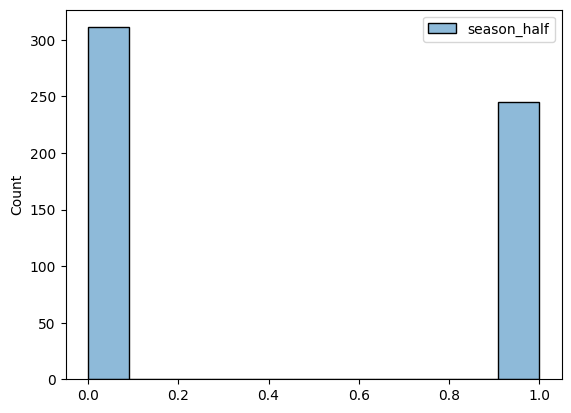

In [311]:
sns.histplot(y)

In [323]:
X = dead.drop(columns = ["episode_num", "season", "name", "season_half"], axis=1)
X.head()

,male,origin,isMarried,isNoble,popularity
0,1,House Targaryen,0,0,0.605351
1,1,House Frey,1,1,0.896321
3,0,House Arryn,1,1,0.183946
5,1,House Baratheon,0,0,1.000000
6,1,House Targaryen,1,1,0.431438


In [313]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder = 'passthrough'
)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [315]:
X_train.columns

Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity', 'season_half'], dtype='object')

In [316]:
X_train

,male,origin,isMarried,isNoble,popularity,season_half
1400,1,Wildling,0,0,0.026756,1
1303,1,Night's Watch,0,0,0.013378,1
1613,1,Wildling,0,1,0.140468,0
1268,0,Foreign Noble,0,1,0.013378,0
1206,1,House Baratheon,0,1,0.063545,0
...,...,...,...,...,...,...
287,1,House Targaryen,0,0,0.000000,0
461,0,House Stark,1,1,0.096990,0
1222,1,House Stark,0,1,0.063545,0
1700,1,House Stark,0,0,0.056856,1


In [317]:
pipe = make_pipeline(preprocessor, LogisticRegression())

In [318]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['origin'])])),
                ('logisticregression', LogisticRegression())])

In [319]:
type(pipe)

sklearn.pipeline.Pipeline

In [50]:
#X_test_transformed = preprocessor.transform(X_test)

In [51]:
#X_test_transformed

In [320]:
pipe.score(X_test, y_test)

1.0

In [321]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring="f1")#"neg_mean_absolute_error")

In [322]:
cv_results['test_score'].mean()

1.0

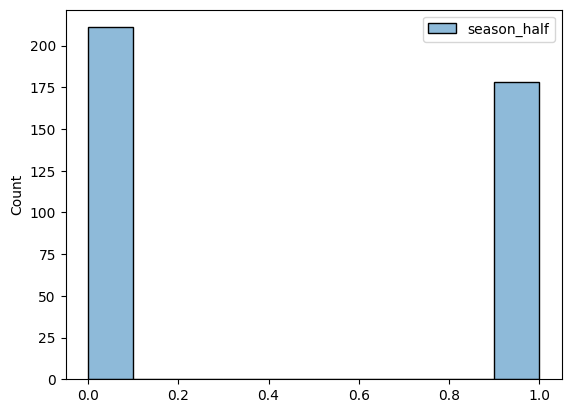

In [286]:
sns.histplot(y_train);

In [288]:
len(y_train)

389

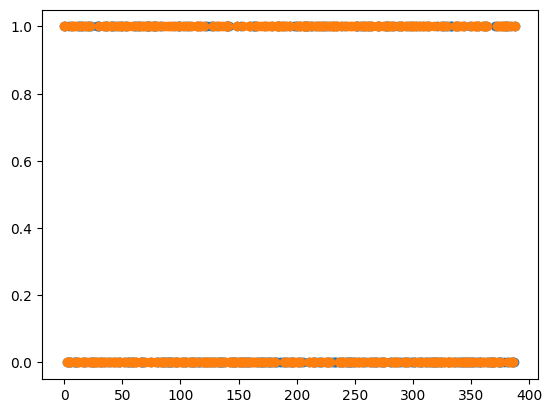

In [287]:
y_pred = pipe.predict(X_train)
plt.scatter(range(len(y_train)), y_pred)
plt.scatter(range(len(y_train)), y_train)
plt.show()

In [ ]:
print(X)

In [ ]:
pipe.fit(X, y)

In [106]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat_transformer',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['origin'])])),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('cat_transformer',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['origin'])]),
 'linearregression': LinearRegression(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('cat_transformer',


In [ ]:
train_sizes = [25, 50, 75, 100, 150, 200, 250, 300, 350]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(train_scores_mean)
print(test_scores_mean)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test score', marker='o')

plt.title('Learning Curves', fontsize=18)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0 for R-squared
plt.legend()
plt.grid(True)
plt.show()

In [252]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

preprocessor.get_feature_names_out()

array(['cat_transformer__origin_Dothraki',
       'cat_transformer__origin_Foreign Noble',
       'cat_transformer__origin_Foreign Peasant',
       'cat_transformer__origin_House Arryn',
       'cat_transformer__origin_House Baratheon',
       'cat_transformer__origin_House Bolton',
       'cat_transformer__origin_House Frey',
       'cat_transformer__origin_House Greyjoy',
       'cat_transformer__origin_House Lannister',
       'cat_transformer__origin_House Martell',
       'cat_transformer__origin_House Stark',
       'cat_transformer__origin_House Targaryen',
       'cat_transformer__origin_House Tully',
       'cat_transformer__origin_House Tyrell',
       "cat_transformer__origin_Night's Watch",
       'cat_transformer__origin_Noble', 'cat_transformer__origin_Outlaw',
       'cat_transformer__origin_Peasant',
       'cat_transformer__origin_Soldier',
       'cat_transformer__origin_Wildling', 'remainder__male',
       'remainder__isMarried', 'remainder__isNoble',
       'remaind

In [109]:
X_train_processed

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02675585],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01337793],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.14046823],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.06354515],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05685619],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [293]:
svm_regressor = SVR()

In [294]:
param_grid = { 
     "C": [1, 2, 3, 4],
     "gamma": [0.1, 0.001, 0.0001, 1],
     "kernel": ["rbf", "linear", "poly", "sigmoid"],
     "degree": [2,3,4]
}
    

search = GridSearchCV(
    svm_regressor,
    param_grid, 
    scoring='r2',
    cv=5, n_jobs=-1
)

search.fit(X_train_processed, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4], 'degree': [2, 3, 4],
                         'gamma': [0.1, 0.001, 0.0001, 1],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='r2')

In [295]:
# Best score
print(search.best_score_)

# Best Params
print(search.best_params_)

# Best estimator
search.best_estimator_

-0.25009808550390533
{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


SVR(C=3, degree=2, gamma=0.1, kernel='poly')

In [163]:
model = ElasticNet()

In [167]:
grid = {'alpha': (stats.uniform(0, 100)), 'l1_ratio':(stats.uniform(0, 1)) }

search = RandomizedSearchCV(
    model,
    grid, 
    scoring='r2',
    cv=5, n_jobs=-1
)

search.fit(X_train_processed, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28ef1ed70>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28ef37430>},
                   scoring='r2')

In [168]:
# Best score
print(search.best_score_)

# Best Params
print(search.best_params_)

# Best estimator
search.best_estimator_

-0.01948341182000437
{'alpha': 52.50324112792949, 'l1_ratio': 0.07877202806972683}


ElasticNet(alpha=52.50324112792949, l1_ratio=0.07877202806972683)

In [182]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model = Sequential()
model.add(layers.Dense(100, input_shape=(X_train_processed.shape[1],), activation='relu'))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(20, activation='relu', kernel_regularizer=reg_l2))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=reg_l1_l2))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer=adam_opt, loss='MeanAbsoluteError', metrics=[tf.keras.metrics.Recall()])

In [186]:
es = EarlyStopping(patience=30)
history = model.fit(X_train_processed, y_train, batch_size=32, epochs=100, validation_split =0.3, callbacks=[es], verbose=0)

In [212]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42)

In [213]:
X_val_processed = preprocessor.transform(X_val)
preprocessor.get_feature_names_out()

array(['cat_transformer__origin_Dothraki',
       'cat_transformer__origin_Foreign Noble',
       'cat_transformer__origin_Foreign Peasant',
       'cat_transformer__origin_House Arryn',
       'cat_transformer__origin_House Baratheon',
       'cat_transformer__origin_House Bolton',
       'cat_transformer__origin_House Frey',
       'cat_transformer__origin_House Greyjoy',
       'cat_transformer__origin_House Lannister',
       'cat_transformer__origin_House Martell',
       'cat_transformer__origin_House Stark',
       'cat_transformer__origin_House Targaryen',
       'cat_transformer__origin_House Tully',
       'cat_transformer__origin_House Tyrell',
       "cat_transformer__origin_Night's Watch",
       'cat_transformer__origin_Noble', 'cat_transformer__origin_Outlaw',
       'cat_transformer__origin_Peasant',
       'cat_transformer__origin_Soldier',
       'cat_transformer__origin_Wildling', 'remainder__male',
       'remainder__isMarried', 'remainder__isNoble',
       'remaind

In [297]:
X_proc = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

In [298]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_processed,y_train)
model.score(X_test_processed,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [167, 41]

In [246]:
pd.DataFrame(np.concatenate([X_train_processed,y_train],axis=1)).corr().loc[24]

0    -0.110410
1     0.031308
2    -0.053892
3    -0.025512
4     0.000529
5    -0.008799
6     0.016276
7    -0.059795
8     0.046016
9     0.042957
10    0.100928
11   -0.157250
12   -0.011808
13    0.126097
14   -0.011950
15    0.011243
16    0.009216
17    0.029862
18    0.055942
19   -0.013267
20    0.064611
21   -0.032839
22    0.050530
23    0.166603
24    1.000000
Name: 24, dtype: float64

In [299]:
grid = {'max_depth': randint(1, 11),
        'n_estimators': randint(100, 600),
        'learning_rate': stats.uniform(0, 1)}

search = RandomizedSearchCV(
    XGBRegressor(),
    grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    error_score='raise'
)

search.fit(X_train_processed, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x288f1bd00>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x288f180d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x176b51c90>},
                   scoring='r2')

In [300]:
# Best score
print(search.best_score_)

# Best Params
print(search.best_params_)

# Best estimator
search.best_estimator_

-0.4986208750173212
{'learning_rate': 0.629015481598647, 'max_depth': 10, 'n_estimators': 315}


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.629015481598647, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=315, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [214]:
xgb_reg = XGBRegressor()#(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_reg.fit(X_train_processed, y_train,
    eval_set=[(X_train_processed, y_train), (X_val_processed, y_val)],  
    early_stopping_rounds=5)

#y_pred = xgb_reg.predict(X_val_processed)

[0]	validation_0-rmse:0.92057	validation_1-rmse:0.92929
[1]	validation_0-rmse:0.77546	validation_1-rmse:0.78965
[2]	validation_0-rmse:0.67658	validation_1-rmse:0.72211
[3]	validation_0-rmse:0.62216	validation_1-rmse:0.68939
[4]	validation_0-rmse:0.58185	validation_1-rmse:0.67666
[5]	validation_0-rmse:0.55269	validation_1-rmse:0.66025
[6]	validation_0-rmse:0.53018	validation_1-rmse:0.67213
[7]	validation_0-rmse:0.50839	validation_1-rmse:0.66854
[8]	validation_0-rmse:0.49305	validation_1-rmse:0.67238
[9]	validation_0-rmse:0.48385	validation_1-rmse:0.68995
[10]	validation_0-rmse:0.47004	validation_1-rmse:0.69323


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [216]:
#pipe_xgb = make_pipeline(xgb_reg)
cv_results = cross_validate(XGBRegressor(), X_train_processed, y_train, cv=5, scoring='r2')
cv_results['test_score'].mean()

-0.6293590619808471